# Test del $\chi^2$

Il test del $\chi^2$ ha come scopo escludere l'ipotesi nulla ($H_0$) che un certo campione di dati segua un modello le cui incertezze si possono approssimare come gaussiane.

Implicitamente, si considera una ipotesi alternativa $H_1$, non ben specificata, nella quale la distirbuzione del $\chi^1$ tenda ad avere valori molto maggiori rispetto all'ipotesi $H_0$, quindi un $p$-value molto più piccolo.

## Distribuzione $\chi^2$

Se abbiamo $k$ variabili distribuite secondo una normale standard (ossia con $\mu=0$ e $\sigma=1$), la loro somma è una variabile $\chi^2$ che segue una distribuzione nota:

$\displaystyle p(\chi^2;k) = \frac{2^{-k/2}}{\Gamma(k/2)}\chi^{k-2}e^{-\chi^2/2}$

La distribuzione ha valore atteso $k$ e varianza $2k$.

Di particolare rilevanza, vedremo, è la sua distribuzione cumulativa che è calcolabile numericamente con funzioni di libreria.

$k$ prende il nome di **numero di gradi di libertà**, e il motivo sarà più chiaro nel seguito.

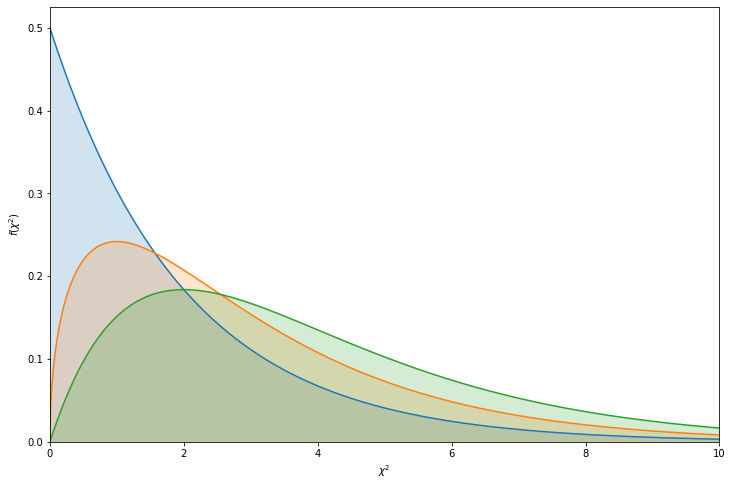

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
plt.figure(figsize=(12,8))
step = 0.01
xmin,xmax = 0,10
x = np.arange(xmin, xmax+step, step)
for ddof in (2, 3, 4):
    y = chi2.pdf(x, ddof)
    plt.fill_between(x, y, alpha=0.2,linewidth=2)
    plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2)$')
plt.show()

## Costruzione del $\chi^2$

Dato un numero $k$ di variabili $x_1,\cdots,x_k$ distribuite in maniera normale, si può costruire una variable $\chi^2$ come segue:

$\displaystyle \chi^2 = \sum_{i=1}^k\frac{(x_i-\mu_i)^2}{\sigma_i^2}$

In presenza di una matrice di correlazione $C_{ij}$ non diagonale, si può ancora definire una variabile $\chi^2$ come segue:

$\displaystyle \chi^2 = \sum_{i,j=1}^k (x_i-\mu_i)C_{ij}(x_j-\mu_j)$

In particolare, se invece i valori attesi $\mu_i$ sono tutti uguali a $\mu$ così come le deviazioni standard $\sigma_i$ sono tutte uguali a $\sigma$, la variabile $\chi^2$ diventa:

$\displaystyle \chi^2 = \sum_{i=1}^k\frac{(x_i-\mu)^2}{\sigma^2}$

Nel caso in cui $\mu$ non è noto e viene stimato come $\hat{\mu} = \bar{x} = \frac{1}{N}\sum_{i=1}^kx_i$, si può ancora definire una variabile $\chi^2$ come:

$\displaystyle \chi^2 = \sum_{i=1}^k\frac{(x_i-\hat{\mu})^2}{\sigma^2}$

ma si può dimostrare che è distribuita come una variabile $\chi^2$ con numero di gradi di libertà pari a $k-1$ anziché $k$.

In generale, ogni volta che si utilizzano, nella definizione del $\chi^2$, parametri stimati dal campione di dati $x_1,\cdots,x_k$, la variabile $\chi^2$ segue una distribuzione con un numero di gradi di libertà pari a $k$ meno il numero di parametri stimati.

## Test del $\chi^2$

Dato un campione, si considera l'ipotesi $H_0$ che il campione segua la distribuzione normale che viene assunta, ossia con i parametri noti o stimati che abbiamo a disposizione.

Si usa come *test statistic* proprio il valore dei $\chi^2$, che segue la distribuzione nota che abbiamo detto *nell'ipotesi che il campione segua la distribuzione normale*. 

*Implicitamente, come ipotesi alternativa $H_1$ consideriamo che il campione segua un'altra distribuzione, diversa da quella normale. Se ci saranno importanti deviazioni, al quadrato, queste farnno aumentare di molto il valore del $\chi^2$, almeno come valore atteso.*

L'ipotesi $H_0$ viene quindi scartata se $\chi^2>\chi^2_{\mathrm{cut}}$, dove $\chi^2_{\mathrm{cut}}$ è il valore che corrisponde al livello di significatività $\alpha$ voluto, tipicamente 5% o 10%:

$\alpha = 1- F(\chi^2_{\mathrm{cut}};k)$

Il $p$-value, di conseguenza, sarà dato dalla probabilità che il $\chi^2$ abbia un valore maggiore o uguale a quanto sservato, $\chi^2_{\mathrm{obs}}$, ossia uno meno la funzione cumulativa:

$p = 1- F(\chi^2_{\mathrm{obs}};k)$

Escludere $\chi^2>\chi^2_{\mathrm{cut}}$ equivale ad escludere $p<\alpha$.

## Bontà del fit

Il testi del $\chi^2$ viene anche utilizzato per misurare la *bontà del fit*. Se il $p$-value risultasse troppo basso si potrebbe escludere che i dati seguano il modello assunto per interpolare i dati.

<span color="ref">Attenzione: in alcuni contesti, ad esempio quando si usa la funzione Confrontiamo con [```scipy.stats.linregres```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), il $p$-value che viene restituito **non** corrisponde al test di bontà del fit. Nel caso specifico,il $p$-value è relativo al test che rigetta l'ipotesi che le misure $y_i$ siano scorrelate dalle misure $x_i$, ossia che sia $R^2=0$.
</span>

## Confronto di proporzioni e applicazioni mediche

Il test del $\chi^2$ si usa per confrontare le proporzioni su due campioni, che tipicamente si confrontano con un metodo tabellare. L'esempio renderà evidente l'applicazione.

Immaginiamo di avere diverse categorie (es.: per i passeggeri del Titanic: maschi e femmine, 1^, 2^ e 3^ classe, ecc.)

Per ciascuna categoria contiamo il numero di casi in cui si verifica un evento oppure no. L'evento può essere l'esito: "sopravvissuto" o "morto".

Per ogniuna delle $k$ categorie, che indichiamo con $i$, conosciamo il numero di casi $n_i$ per cui si verifica l'evento ed il totale dei casi $N_i$.

Possiamo anche stimare la frazione di casi *media* per cui si verifica l'evento, ossia:

$\displaystyle \hat{f} =\frac{\sum_{i=1}^k n_i}{\sum_{i=1}^k N_i}$

Da qui possiamo calcolare il valore *atteso* se ciascuna categoria avesse un valore corrispondente alla media:

$n_i^{\mathrm{exp}} = \hat{f} N_i$

Costruiamo quindi il $\chi^2$, assumendo un'approssimazione gaussiana della distribuzione binomiale, come:

$\displaystyle\chi^2 = \sum_{i=1}^k \frac{(n_i - n_i^{\mathrm{exp}})^2}{n_i^{\mathrm{exp}}}$

Questa definizione, con il valore atteso al denominatore, è detto *$\chi^2$ di Pearson*.
Invece il $\chi^2$ di Neyman usa $n_i$ al denominatore.

In questo caso, si approssima la *varianza* di $n_i$ ad $n_i^{\mathrm{exp}}$, nell'ipotesi $H_0$.

Siccome la stima $\hat{f}$ è determinata dallo stesso campione, il numero di gradi di libertà sarà $k-1$.

Analoga procedura si potrà applicare per testare se le frazioni osservate corrispondono a valori attesi noti $f_i$.

## Mortalità sul Titanic

Carichiamo i dati dei passeggeri del Titanic, già considerati in un altro notebook. 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/titanic passenger list.csv')

In [4]:
contigency= pd.crosstab(df['sex'], df['survived'])

In [5]:
contigency

survived,0,1
sex,,
female,127,339
male,682,161


Usiamo [```seaborn```](https://seaborn.pydata.org/) per visualizzare la mappa colorata, è un po' più sintetico di quanto abbiamo fatto con l'esercizio sul Titanic.

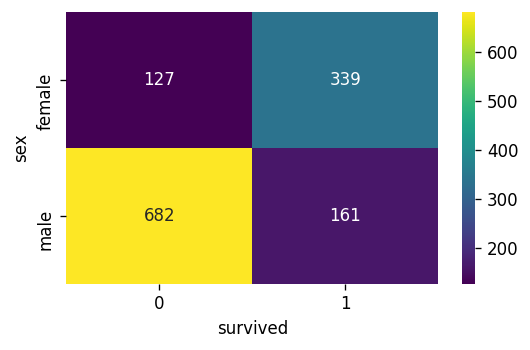

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3), dpi=120)
sns.heatmap(contigency, annot=True, fmt="d", cmap="viridis")
plt.show()

Le percentuali si possono ottenere con l'opzione ```normalize```.

In [7]:
contigency_pct = pd.crosstab(df['sex'], df['survived'], normalize='index')
contigency_pct

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


Completiamo la tabella con la somma di tutte le righe:

In [8]:
c_tab = contigency.copy()
c_tab.loc["all"] = c_tab.sum()
c_tab

survived,0,1
sex,,
female,127,339
male,682,161
all,809,500


In [9]:
c_tab['tot']=c_tab[0]+c_tab[1]
c_tab['frac'] = c_tab[1]/(c_tab['tot'])
surv_frac = c_tab.at['all','frac']
print('survived fraction: ',surv_frac)
c_tab['expected_survived']=surv_frac*c_tab['tot']
c_tab

survived fraction:  0.3819709702062643


survived,0,1,tot,frac,expected_survived
sex,,,,,
female,127,339,466,0.727468,177.998472
male,682,161,843,0.190985,322.001528
all,809,500,1309,0.381971,500.000000


Calcoliamo le differenze quadratiche che formeranno il $\chi^2$

In [10]:
c_tab['resid']=c_tab[1]-c_tab.expected_survived
c_tab['resid2']=c_tab.resid**2
c_tab['resid2_norm']=c_tab.resid2/c_tab.expected_survived
c_tab

survived,0,1,tot,frac,expected_survived,resid,resid2,resid2_norm
sex,,,,,,,,
female,127,339,466,0.727468,177.998472,161.001528,25921.491981,145.627609
male,682,161,843,0.190985,322.001528,-161.001528,25921.491981,80.501146
all,809,500,1309,0.381971,500.000000,0.000000,0.000000,0.000000


In [11]:
c2 = c_tab['resid2_norm'].sum()
print(c2)

226.12875536989802


Il calcolo della cumulativa viene approssimato a zero:

In [12]:
1-chi2.cdf(c2, 1)

0.0

Meglio usare la funzione ```sf``` che ha un'implementazione più accurata:

In [13]:
p=chi2.sf(c2, 1)
print("p = ",p)

p =  4.1651155860234655e-51


In [14]:
from scipy.stats import norm
from scipy import optimize
z = optimize.root(lambda z: norm.cdf(-z)-p, 3).x[0]
print("Z = {:.2f}σ".format(z))

Z = 14.99σ


La significatività super di gran lunga quella necessaria per dichiarare una scoperta ($5\sigma$), come era evidente dai dati.

Possiamo usare anche la funzione ```chisquare``` per calcolare il $\chi^2$ in base alle frequenze osservate e quelle attese.

In [15]:
from scipy.stats import chisquare
f_obs = contigency[1]
f_surv = contigency[1].sum()/(contigency[0].sum()+contigency[1].sum())
f_exp = f_surv*(contigency[0]+contigency[1])
chi2_obs = chisquare(f_obs, f_exp=f_exp)
print("chi2 = {:.2f}, p-value = {:.2e}".format(chi2_obs.statistic, chi2_obs.pvalue))

chi2 = 226.13, p-value = 4.17e-51


# Spunti per esercizi

* calcolare il $p$-value dell'ipotesi nulla che la mortalità sia uguale in 1^, 2^ e 3^ classe.

* Vogliamo testarese la distribuzione dei rigori in Serie A sia unoforme oppure no. Applichiamo il test del $\chi^2$ per diversi insiemi di dati:
* Juventus, Inter, Milan, Roma e Napoli per gli ultimi 11 anni
* Juventus, Inter, Milan, Roma e Napoli per gli ultimi 3 anni
* Tutte le squadre per gli ultimi 11 anni

In [16]:
import pandas as pd
df = pd.read_csv('data/penalty.csv')
df

,Years,Napoli,Juventus,Roma,Inter,Lazio,Milan,Fiorentina,Udinese,Bologna,Cagliari,Genoa
0,11,10,5,13,6,5,6,4,7,4,2,3
1,12,9,4,4,11,7,10,8,5,3,6,6
2,13,11,11,7,5,9,11,10,6,5,10,4
3,14,9,4,6,1,8,5,12,8,6,8,9
4,15,9,9,7,7,5,11,7,1,0,7,7
5,16,8,9,4,3,11,7,9,4,3,0,4
6,17,8,3,14,5,14,12,10,3,2,6,3
7,18,8,8,6,7,11,6,8,7,3,5,5
8,19,4,8,6,9,6,4,6,8,5,3,5
9,20,5,14,14,11,18,9,11,0,6,6,16
